In [1]:
import json

def load_articles_from_file(file):
    """Načte články ze souboru."""
    with open(file, 'r') as f:
        articles = json.load(f)
    return articles


articles = load_articles_from_file("articles.json")

 
    


In [2]:
# 1. Výpis počtu článků
print(f"Počet článků: {len(articles)}")

Počet článků: 393227


In [31]:

# 2. Výpis počtu duplicitních článků
# Mají stejný název
titles = [article["title"] for article in articles]
duplicates = len(titles) - len(set(titles))
print(f"Počet duplicitních článků: {duplicates}")
print(f"v %: {duplicates/len(articles)*100:.2f}%")

Počet duplicitních článků: 21698
v %: 5.69%


In [4]:
# 3. Vypsat datum nejstaršího článku
# "date_published": "2006-08-21T12:12:52+02:00"
import datetime
dates = [article["date_published"] for article in articles]
datetime_dates = []
errcount = 0
for i, date in enumerate(dates):
    try:
        datetime_dates.append(datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z"))
    except:
        pass
oldest_date = min(datetime_dates)
print(f"Nejstarší článek: {oldest_date.strftime('%d.%m.%Y')}")


Nejstarší článek: 27.01.1998


In [5]:



# Vypsat jméno článku s nejvíce komentáři
comments = [article["comments"] for article in articles]
max_comments = max(comments)
article_index = comments.index(max_comments)
article_title = articles[article_index]["title"]
print(f"Článek s nejvíce komentáři: {article_title} má {max_comments} komentářů")


Článek s nejvíce komentáři: Zemřel Adamec, komunista, který předal moc Havlovi má 611811 komentářů


In [6]:


# Vypište nejvyšší počet přidaných fotek v jednom článku
images = [article["image_count"] for article in articles]
max_images = max(images)
article_index = images.index(max_images)
article_title = articles[article_index]["title"]
print(f"Článek s nejvíce fotkami: {article_title} má {max_images} fotek")


Článek s nejvíce fotkami: Zneškodnili jsme dva vysoce postavené členy Hamásu, hlásí izraelská armáda má 400 fotek


Počty článků podle roku publikace:
1998: 1044
1999: 3447
2000: 5628
2001: 13608
2002: 9907
2003: 9439
2004: 9749
2005: 10113
2006: 10167
2007: 14558
2008: 15445
2009: 17644
2010: 18346
2011: 36164
2012: 18727
2013: 16902
2014: 14451
2015: 16122
2016: 18496
2017: 16479
2018: 16329
2019: 15002
2020: 16534
2021: 17191
2022: 16918
2023: 17481
2024: 16999


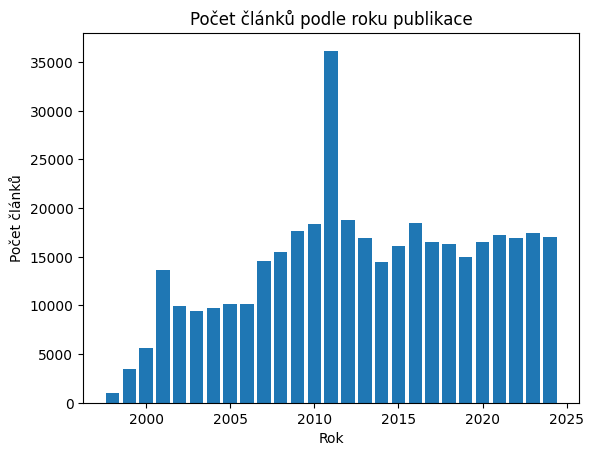

In [7]:


# Vypsat počty článků podle roku publikace
from collections import defaultdict
years_count = defaultdict(int)
for date in datetime_dates:
    years_count[date.year] += 1
# seřadit roky
years_count = dict(sorted(years_count.items()))
print("Počty článků podle roku publikace:")
for year, count in years_count.items():
    print(f"{year}: {count}")

# Vytvořte graf počtu článků podle roku publikace
import matplotlib.pyplot as plt
plt.bar(years_count.keys(), years_count.values())
plt.xlabel("Rok")
plt.ylabel("Počet článků")
plt.title("Počet článků podle roku publikace")
plt.show()



    

In [12]:
# Vypište počet unikátních kategorií a počet článků v každé kategorii
categories = [article["category"] for article in articles]
unique_categories = set(categories)
print(f"Počet unikátních kategorií: {len(unique_categories)}")
categories_count = defaultdict(int)
for category in categories:
    categories_count[category] += 1


print("Počty článků v každé kategorii:")
# VYPSAT  prvních 20 kategorii s nejvyší počtem článků
for category, count in list(categories_count.items())[:20]:
    print(f"{category}: {count}")

# Vytvořte graf počtu článků v každé kategorii (pouze kategorie s 100+ články)
categories_count = {category: count for category, count in categories_count.items() if count >= 1500}
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=list(categories_count.keys()), y=list(categories_count.values()))])
fig.update_layout(title="Počet článků v každé kategorii (kategorie s 100+ články)")
fig.show()


Počet unikátních kategorií: 521
Počty článků v každé kategorii:
Domácí: 151493
Zahraničí: 112925
Hradec Králové: 5070
Olomouc: 5113
Jihlava: 3011
Brno: 8660
Extrémní deště a povodně 2024: 1
Ostrava: 5755
Liberec: 2945
Volby: 1608
Praha a střední Čechy: 13854
Zlín: 3290
Ústí nad Labem: 5088
Karlovy Vary: 3498
Počasí: 1
Revue: 511
Ekonomika: 3541
Pardubice: 3637
Finance: 145
České Budějovice: 4388


In [14]:
# Vypsat 5 nejčastějších slov v názvu článků z roku 2021
titles_2021 = []
for article in articles:
    try:
        if datetime.datetime.strptime(article["date_published"], "%Y-%m-%dT%H:%M:%S%z").year == 2021:
            titles_2021.append(article["title"])
    except ValueError:
        continue

from collections import Counter
words = []
for title in titles_2021:
    words.extend(title.split())
words_count = Counter(words)
most_common_words = words_count.most_common(5)
print("5 nejčastějších slov v názvu článků z roku 2021:")
for word, count in most_common_words:
    print(f"{word}: {count}")

5 nejčastějších slov v názvu článků z roku 2021:
na: 3684
v: 3632
se: 3575
a: 2245
je: 1530


In [15]:
# Celkový počet komentářů
total_comments = sum(comments)
print(f"Celkový počet komentářů: {total_comments}")


Celkový počet komentářů: 54635811


In [16]:
# Celkový počet slov ve všech článcích
words = []
for article in articles:
    words.extend(article["content"].split())
total_words = len(words)
print(f"Celkový počet slov ve všech článcích: {total_words}")

Celkový počet slov ve všech článcích: 132330788


# Bonus

In [17]:
# 8 nejčastějších slov v článcích (6+ znaků)
words = []
for article in articles:
    words.extend(article["content"].split())
words = [word for word in words if len(word) >= 6]
words_count = Counter(words)
most_common_words = words_count.most_common(8)
print("8 nejčastějších slov v článcích (6+ znaků):")
for word, count in most_common_words:
    print(f"{word}: {count}")


8 nejčastějších slov v článcích (6+ znaků):
mluvčí: 153725
jejich: 132696
policie: 108986
protože: 107914
například: 106295
několik: 83231
kterou: 73324
policejní: 71703


In [18]:
# Vypište 3 články s nejvyččím počtem výskytů slova "Covid-19"
articles_covid = []
word = "covid-19"
for article in articles:
    if word.lower() in article["content"].lower():
        articles_covid.append(article)
articles_covid = sorted(articles_covid, key=lambda x: x["content"].lower().count(word.lower()), reverse=True)
print("3 články s nejvyččím počtem výskytů slova 'Covid-19':")
for article in articles_covid[:3]:
    print(f"{article['title']}: {article['content'].lower().count(word.lower())} výskytů")

3 články s nejvyččím počtem výskytů slova 'Covid-19':
Jak na koronavirus? Má pomoci zkušenost z boje proti AIDS, malárii či ebole: 16 výskytů
Otázky a odpovědi: Jak mají rodiče naložit s průběhem COVID-19 u dětí: 16 výskytů
Španělsko má nejmíň nových obětí za měsíc, Kurz svolal lídry úspěšných zemí: 15 výskytů


In [27]:
# vypište články s nejvyšším a nejnižším počtem slov
articles = sorted(articles, key=lambda x: len(x["content"].split()))
# ODFILTROVAT TY s 0 slovy
articles = [article for article in articles if len(article["content"].split()) > 15]
print(f"Článek: {articles[-1]['title']}, počet slov: {len(articles[-1]['content'].split())}")
print(f"Článek: {articles[0]['title']}, počet slov: {len(articles[0]['content'].split())}")
print(articles[0]["content"])


Článek: Václav Klaus (56 let): Odpovědi 70 - 117, počet slov: 20891
Článek: Na Litoměřicku při požáru bytu zemřela seniorka, patrně kouřila v posteli, počet slov: 31
„Přesnou příčinu vzniku požáru potvrdí další vyšetřování,“ uvedl mluvčí hasičů Tomáš Kalvoda. Požár byl hasičům nahlášen v 19:15, likvidaci vyhlásili krátce po 20. hodině. Oheň odhadem způsobil škodu půl milionu korun.


In [32]:
# Průměrná délka slova přes všechny články
words = []
for article in articles:
    words.extend(article["title"].split())
    words.extend(article["content"].split())
word_lengths = [len(word) for word in words]
average_word_length = sum(word_lengths) / len(word_lengths)
print(f"Průměrná délka slova přes všechny články: {average_word_length}")


Průměrná délka slova přes všechny články: 5.614289830020591


Měsíc s nejvíce publikovanými články: 3 (34926 článků)
Měsíc s nejméně publikovanými články: 12 (30392 článků)


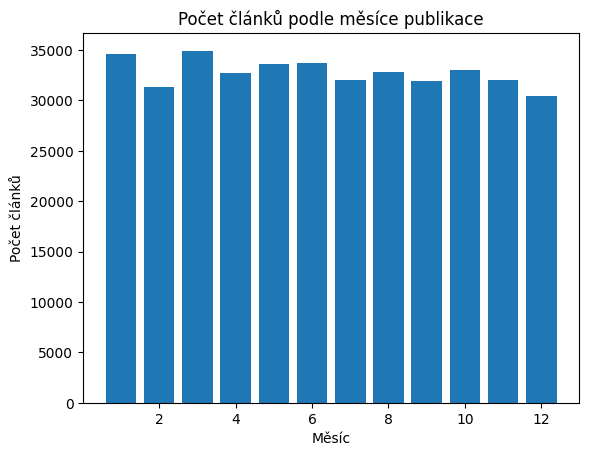

In [30]:
# Vypište měsíce s nejvíce a nejméně publikovanými články
months_count = defaultdict(int)
for date in datetime_dates:
    months_count[date.month] += 1
months_count = dict(months_count)
max_month = max(months_count, key=months_count.get)
min_month = min(months_count, key=months_count.get)
print(f"Měsíc s nejvíce publikovanými články: {max_month} ({months_count[max_month]} článků)")
print(f"Měsíc s nejméně publikovanými články: {min_month} ({months_count[min_month]} článků)")

# Vytvořte graf počtu článků podle měsíce publikace

months_count = dict(sorted(months_count.items()))
plt.bar(months_count.keys(), months_count.values())
plt.xlabel("Měsíc")
plt.ylabel("Počet článků")
plt.title("Počet článků podle měsíce publikace")
plt.show()

